# 連接 Colab，並安裝需要套件

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive

/content/drive/MyDrive


In [3]:
! pip install cython
! pip install opencv-python pillow pycocotools matplotlib

# Yolact

In [4]:
%cd Yolact_training/

/content/drive/MyDrive/Yolact_training


In [ ]:
! git clone https://github.com/dbolya/yolact.git

Cloning into 'yolact'...
remote: Enumerating objects: 2936, done.
remote: Total 2936 (delta 0), reused 0 (delta 0), pack-reused 2936
Receiving objects: 100% (2936/2936), 21.20 MiB | 13.27 MiB/s, done.
Resolving deltas: 100% (2003/2003), done.
Checking out files: 100% (100/100), done.


In [5]:
%cd yolact

/content/drive/MyDrive/Yolact_training/yolact


In [6]:
! mkdir weights

In [ ]:
# 下載 pretrained weights 並放入 weights 資料夾
# https://drive.google.com/file/d/1Jy3yCdbatgXa5YYIdTCRrSV0S9V5g1rn/view

# 修改 data/config.py

In [ ]:
# 更改第 108 行 dataset_base = Config()
# 由於我的類別只有一個 (person)，因此 label_map 為 {1:1}

In [ ]:
# 'name': 'My Dataset', (也可不改)
# 'train_images': './data/my_dataset/',
# 'train_info': './data/my_dataset/annotations.json',
# 'valid_images': './data/my_dataset/',
# 'valid_info': './data/my_dataset/annotations.json',
# 'has_gt': True,
# 'class_names': ('raccoon'),
# 'label_map': {1:1}

In [ ]:
# 更改第 656 行 yolact_base_config = coco_base_config()

In [ ]:
# 將 dataset 改為剛剛設定的 dataset 名稱、num_classes 改為 background + 類別數
# backbone 改為 resnet50_backbone

In [ ]:
# 'dataset': dataset_base, (若沒更改dataset_base = Config()名稱)
# 'num_classes': 2,
# 'backbone': resnet50_backbone.copy({...})

In [ ]:
# 也可修改其他超參數
# 'lr_steps': (1400, 3000, 3500, 3750)
# 'max_iter'：4000

# 訓練模型

In [ ]:
# 更改第 249 行 data_loader = data.DataLoader() 裡 shuffle=False

In [ ]:
! python train.py --config=yolact_base_config --save_interval=1000

# 測試模型

In [7]:
! python eval.py --trained_model=weights/yolact_base_399_2000.pth --score_threshold=0.3 --top_k=100 --image=test.jpg:output_image.png

Config not specified. Parsed yolact_base_config from the file name.

/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
Loading model... Done.


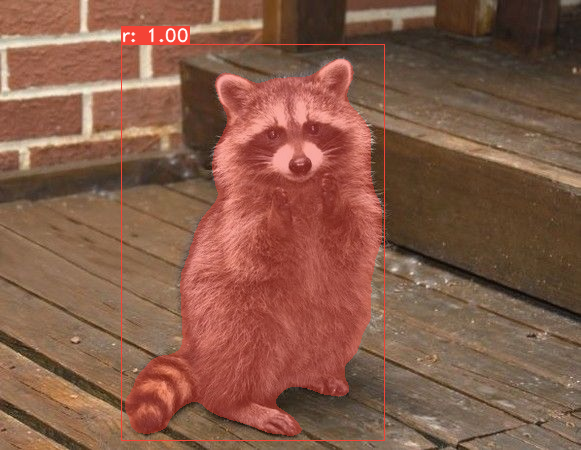

In [8]:
from PIL import Image
Image.open('output_image.png')